## How do we pick the batsman for IPL Fantasy

In [112]:
%matplotlib inline

import requests
import functools
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [113]:
SCORING_URL = "https://cricketapi.platform.iplt20.com//fixtures/{match_id}/scoring"
ALL_MATCH_IDS = range(7894, 7916)

In [114]:
@functools.lru_cache()
def get_match(match_id):
    r = requests.get(SCORING_URL.format(match_id=match_id))
    return r.json()


innings = lambda match_info: match_info['innings']
innings_score_card = lambda innings: innings['scorecard']
batting_stats = lambda sc: sc['battingStats']


### Firstly, gather all the stats till now

In [124]:
stats = []

for match_id in ALL_MATCH_IDS:
    match_info = get_match(match_id)

    for inning in innings(match_info):
        for i, stat in enumerate(batting_stats(innings_score_card(inning))):
            if 'mod' in stat:
                del stat['mod'] # we don't need mode of dismissal for this project
            
            if 'additionalPlayerIds' in stat:
                del stat['additionalPlayerIds']

            stat['match_id'] = match_id
            stat['position'] = i + 1
            stats.append(stat)

print("Total batting stats gathered: {}".format(len(stats)))

Total batting stats gathered: 347


Now lets convert it to a Dataframe and visualize the top 5 items. 

In [125]:
df = pd.DataFrame(stats)
df.head()

,4s,6s,b,match_id,playerId,position,r,sr
0,1,1,18,7894,107,1,15,83.33
1,0,0,2,7894,872,2,0,0.00
2,4,1,29,7894,2975,3,40,137.93
3,6,1,29,7894,108,4,43,148.27
4,2,0,20,7894,2740,5,22,110.00


Everything looks good!

### Distribution of runs scored between top3, middle order and tail

Total runs scored: 7067


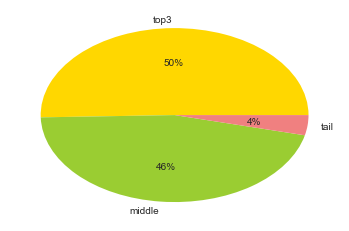

In [126]:
top_3 = range(1, 4)
middle_order = range(4, 8)
tail = range(8, 12)

total_runs_scored = df.r.sum()
runs_scored_by_top_3 = df[df.position.isin(top_3)].r.sum()
runs_scored_middle_order = df[df.position.isin(middle_order)].r.sum()
runs_scored_tail = df[df.position.isin(tail)].r.sum()

print("Total runs scored: {}".format(total_runs_scored))

# sns.set_style('darkgrid')
plot = plt.pie([runs_scored_by_top_3, runs_scored_middle_order, runs_scored_tail], 
               colors=('gold', 'yellowgreen', 'lightcoral'),
               labels=['top3', 'middle', 'tail'], 
               autopct='%1.0f%%')

It is nearly an even split between top and middle order. Lets dive deeper...

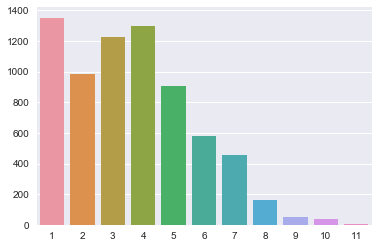

In [127]:
positions = df.position.unique()
runs = []
for pos in positions:
    runs.append(df[df.position == pos].r.sum())

plot = sns.barplot(x=positions, y=runs)

Had you picked the main opener and 2-down you would be well off in scoring the batting points!